# Average prices of a property type per neighborhood
## Business Understanding
We want to get an overview of the average prices per accomodation type in a neighbourhood.


In [11]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline



## Data Understanding - Gather
Three datasets are provided. 
* Listings, including full descriptions and average review score
* Reviews, including unique id for each reviewer and detailed comments
* Calendar, including listing id and the price and availability for that day
All the needed data to answer the question about accomodation types and prices per neighbourhood is included within the listings dataset. So we will not use review or calendar datasets for this.

From evalations in [evaluate_types_per_neighbourhood.ipynb](evaluate_types_per_neighbourhood.ipynb) we already know, we have to use neighbourhood_group_cleansed as data source for the neighbourhoods but how will we best get the price data?

In [12]:
# Read the datasets
# df_seattle_calendar = pd.read_csv('./data/seattle/calendar.csv')
df_seattle_listings = pd.read_csv('./data/seattle/listings.csv')
# df_seattle_reviews = pd.read_csv('./data/seattle/reviews.csv')


In [13]:
# Prepare data like we did in evaluate_types_per_neighbourhood.ipynb
neighbourhood_group_cleansed = set(df_seattle_listings['neighbourhood_group_cleansed'])
acco_types = set(df_seattle_listings['property_type'].dropna(axis=0))


## Data Understanding - Assess
What information columns are probably the best to retrieve the desired data?
We already know about what columns to use for the neighbourhood and property type related data. What is best column to get the desired price information?

In [14]:
for col_name in df_seattle_listings.columns:
    if 'price' in col_name:
        print(col_name)

price
weekly_price
monthly_price


In [15]:
# We will use the daily price without taking additional fees for cleaning aso. into account.
# with this we can now reduce our dataset to the max
reduced_df_seattle_listings = df_seattle_listings[['property_type', 'neighbourhood_group_cleansed', 'price']]


## Evaluation - Visualize
First shot to get a visualization for one neighbourhood's average prize per property types

In [16]:
# before plotting everyting sort list and bring 'Other neighborhoods' to end
neighbourhood_group_cleansed = list(neighbourhood_group_cleansed)
neighbourhood_group_cleansed.sort()
neighbourhood_group_cleansed.remove('Other neighborhoods')
neighbourhood_group_cleansed.append('Other neighborhoods')
neighbourhood_group_cleansed

['Ballard',
 'Beacon Hill',
 'Capitol Hill',
 'Cascade',
 'Central Area',
 'Delridge',
 'Downtown',
 'Interbay',
 'Lake City',
 'Magnolia',
 'Northgate',
 'Queen Anne',
 'Rainier Valley',
 'Seward Park',
 'University District',
 'West Seattle',
 'Other neighborhoods']

In [17]:
# start again with 'Ballard'
acco_prices = df_seattle_listings[df_seattle_listings['neighbourhood_group_cleansed'] == 'Ballard'][['property_type','price']]

# prices are in string - need to convert them
convert_to_float = lambda col: float(col.split('$')[1])
acco_prices['price'] = acco_prices['price'].apply(convert_to_float)

# df.groupby(['CompanySize']).mean()['JobSatisfaction'].sort_values()
mean_prices_per_group = acco_prices.groupby(['property_type']).mean()['price']
mean_prices_per_group

property_type
Apartment          108.066667
Bed & Breakfast     84.500000
Boat                75.000000
Bungalow            85.000000
Cabin               89.000000
Camper/RV           75.000000
Condominium         88.333333
House              136.589041
Loft                82.000000
Townhouse          106.272727
Name: price, dtype: float64

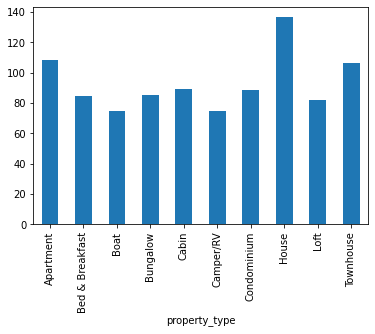

In [18]:
mean_prices_per_group.plot(kind='bar', legend=None);

## Evaluation - Analyze
Data seems to be ready to answer our question about the average prices per property types and per neighbourhood. 

## Data Preparation - Clean
Prices within our dataset are not numeric. We have to do some transformation here. This is only small logic and we will do it within our plot function

In [8]:
def plot_medium_price_per_accomodation_type(sub_plot, df, neighbourhood_name):
    """Adds a bar diagramm to a given subplot.

    Arguments:
    sub_plot            -- the subplot to add the pie diagramm to
    df                  -- dataframe containing (at least) the relevant columns neighbourhood_group_cleansed, property_type and price
    neighbourhood_name  -- string used as subplot title
    """
    acco_prices = df[df['neighbourhood_group_cleansed'] == neighbourhood_name][['property_type','price']]

    # prices are in string - need to convert them
    convert_to_float = lambda col: float(col.split('$')[1].replace(',',''))
    acco_prices['price'] = acco_prices['price'].apply(convert_to_float)

    # df.groupby(['CompanySize']).mean()['JobSatisfaction'].sort_values()
    mean_prices_per_group = acco_prices.groupby(['property_type']).mean()['price'].sort_values(ascending=True)
    mean_prices_per_group.plot(kind='bar', legend=None, ax=sub_plot, fontsize=13)
    sub_plot.set_title(neighbourhood_name, size=25)
    sub_plot.set_ylabel('Accomodation Types', size=15)
    sub_plot.set_ylabel('Average Price per Day', size=15)


## Evaluation - Visualize (again)
Our final visualization is about all the neighbourhoods.

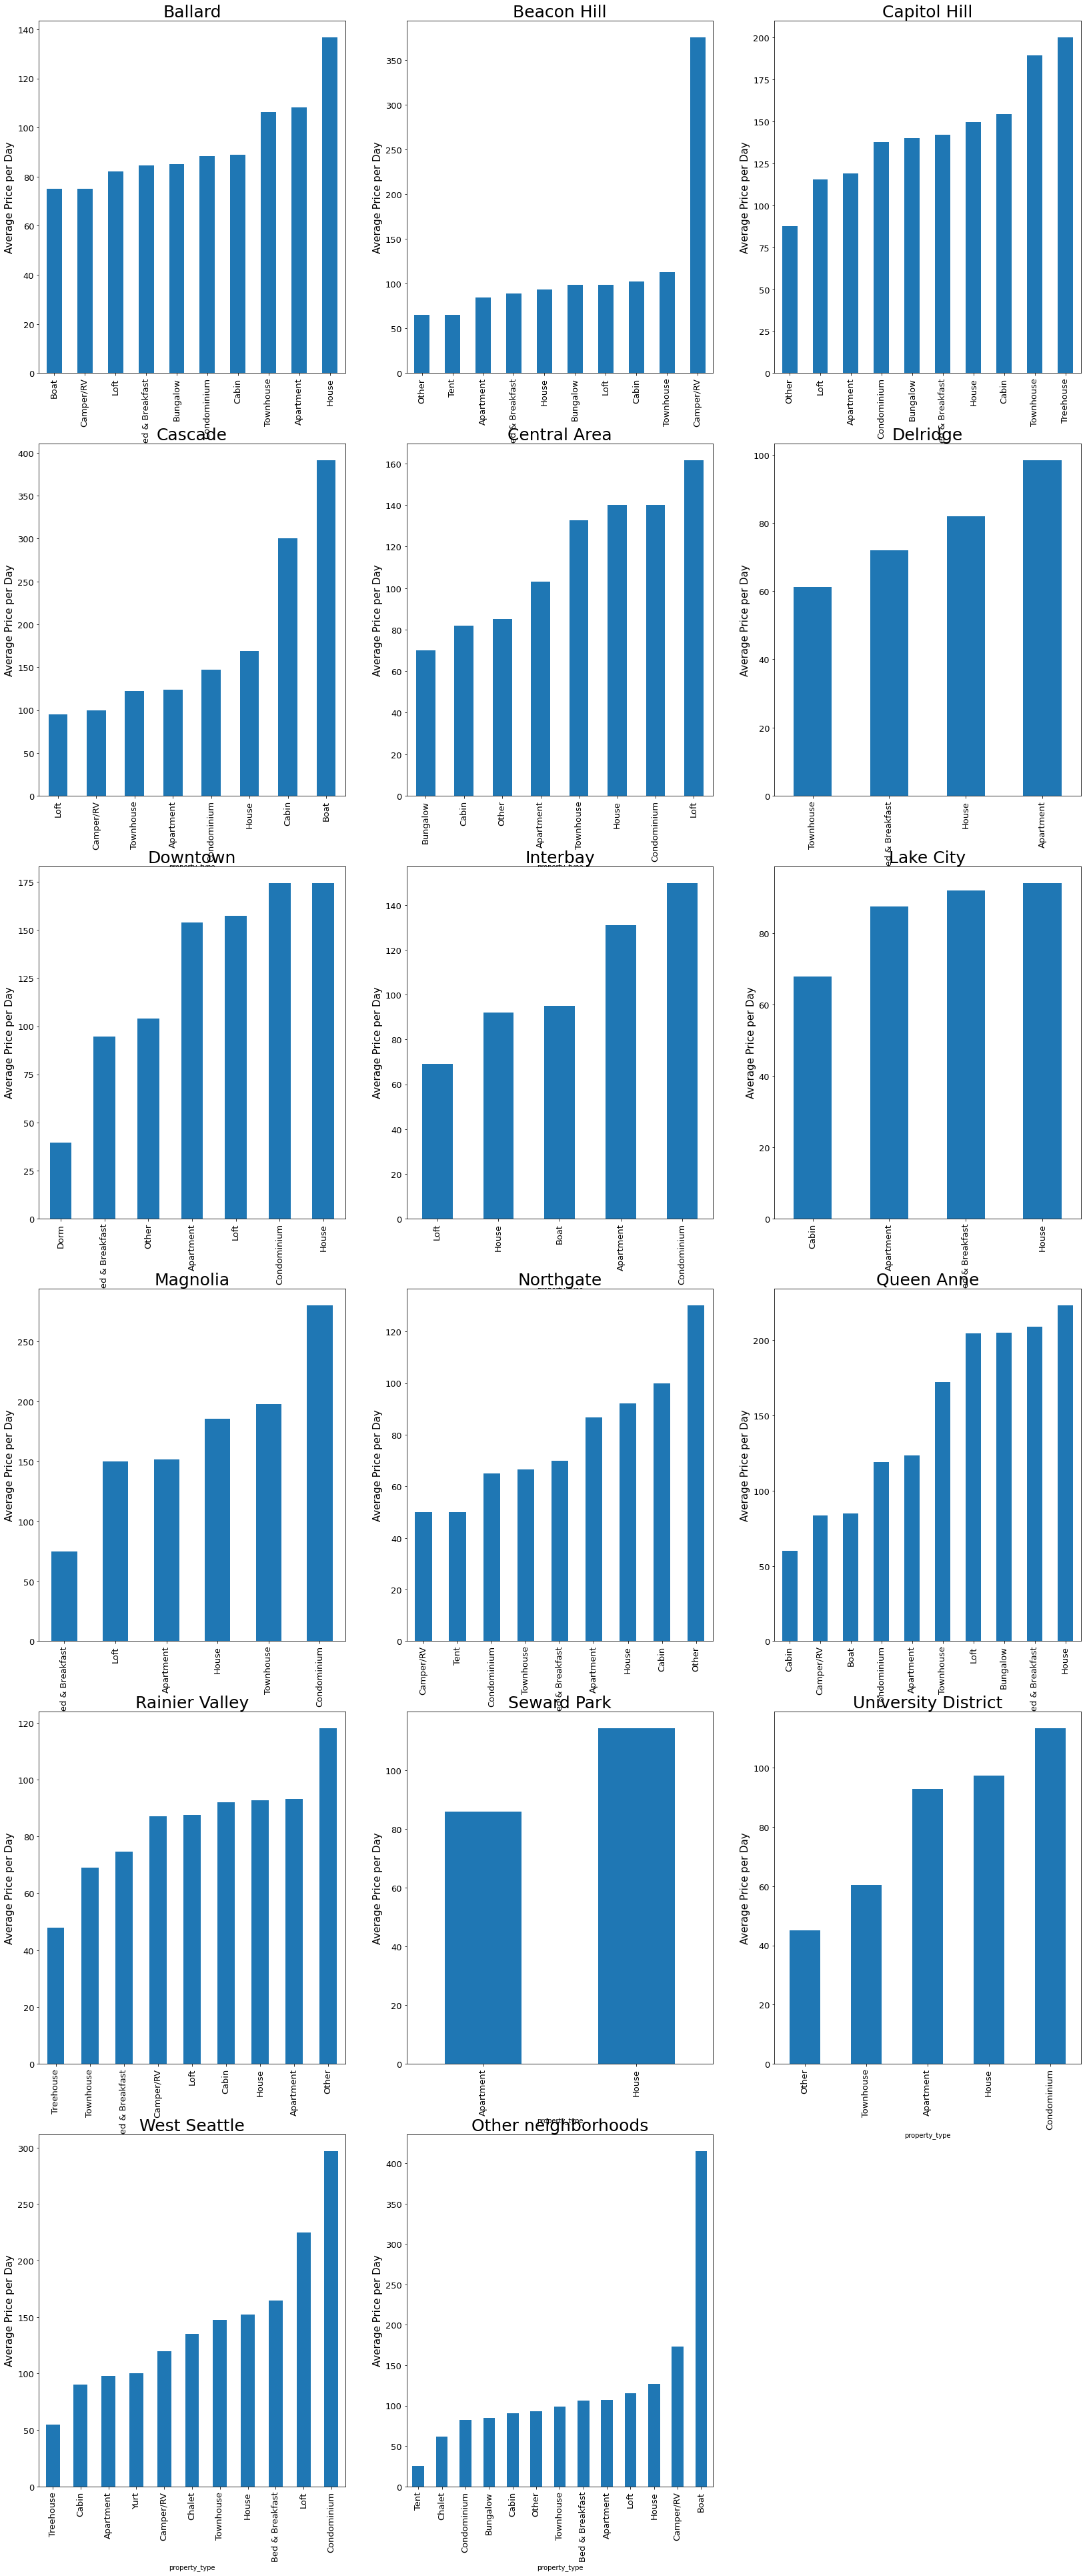

In [10]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(7 * 4,len(neighbourhood_group_cleansed)*4))
# fig, ax = plt.subplots(nrows=len(neighbourhood_group_cleansed), figsize=(7,len(neighbourhood_group_cleansed)*7))
for index, neighbourhood in enumerate(neighbourhood_group_cleansed):
    col = index % 3
    row = int(index / 3)

    plot_medium_price_per_accomodation_type(ax[row][col], df_seattle_listings, neighbourhood)
# turn last (unused) subplot off
ax[5,2].set_axis_off()

## Deployment
The result of this notebook is part of the blog post [Plan Your Seattle Accommodation the Data Scientific Way](blogpomst.md)